## This notebook serves as a demonstration of the model training process, as the actual training will take a long time and exceed the GPU limit in Colab. Additionally, running the model on a local machine is also challenging. Therefore, I will train the model multiple times with hyperparameter tuning and test it using the GPU provided by college. Once the training is complete, I will save the necessary files such as the tested images, model weights, required plots, and the final set of hyperparameters. The purpose of sharing this Colab notebook is to verify that the code is working, and faster-rcnn takes longer time for training in the GPU provided by colab, so the training of model is done for only 2 epochs.

In [ ]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1183, done.
remote: Counting objects: 100% (291/291), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 1183 (delta 225), reused 216 (delta 211), pack-reused 892
Receiving objects: 100% (1183/1183), 10.53 MiB | 4.34 MiB/s, done.
Resolving deltas: 100% (807/807), done.


In [ ]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [ ]:
# Install the Requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OSLhcqWhfESZtihkHlXl")
project = rf.workspace("siewchinyip-outlook-my").project("sixray")
dataset = project.version(4).download("voc")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d72e50ab72d212a7fd955cb82c8276830faec86ae5976206ab6e1818f852ac68
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

Extracting Dataset Version Zip to Sixray-4 in voc:: 100%|██████████| 16629/16629 [00:04<00:00, 3600.64it/s]


## Create the Custom Dataset YAML File.

In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/fastercnn-pytorch-training-pipeline/Sixray-4/train'
TRAIN_DIR_LABELS: '/content/fastercnn-pytorch-training-pipeline/Sixray-4/train'
VALID_DIR_IMAGES: '/content/fastercnn-pytorch-training-pipeline/Sixray-4/valid'
VALID_DIR_LABELS: '/content/fastercnn-pytorch-training-pipeline/Sixray-4/valid'

# Class names.
CLASSES: [
    '__background__',
    'Gun', 'Knife', 'Pliers', 
    'Scissors', 'Wrench'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## Training

In [ ]:
!pip install vision_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vision_transformers: filename=vision_transformers-0.1.1.0-py3-none-any.whl size=48431 sha256=24dd0897062d8e81685817c87216fde93bc30a75ce4171981d8233098637288b
  Stored in directory: /root/.cache/pip/wheels/02/f4/94/0a5c8d2a4fcb6aa4c590906ffd3d52dc8edbe94262ecaa7dae
Successfully built vision_transformers


In [ ]:
!python train.py --data /content/fastercnn-pytorch-training-pipeline/data_configs/custom_data.yaml --epochs 3 --model fasterrcnn_resnet50_fpn --name custom_training --batch 8

Not using distributed mode
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose "Don't visualize my results"
wandb: Tracking run with wandb version 0.15.0
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
device cuda
2023-04-27 17:26:10.768619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 17:26:11.900813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating data loaders
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker proc

## Visualize Validation Results

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

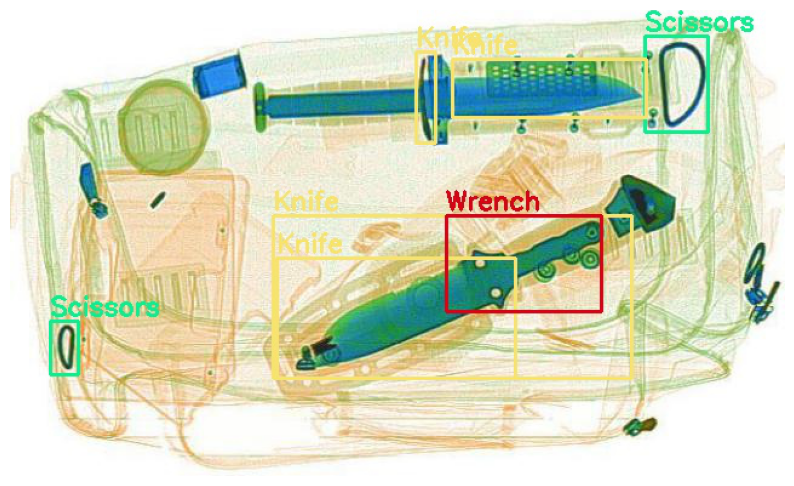

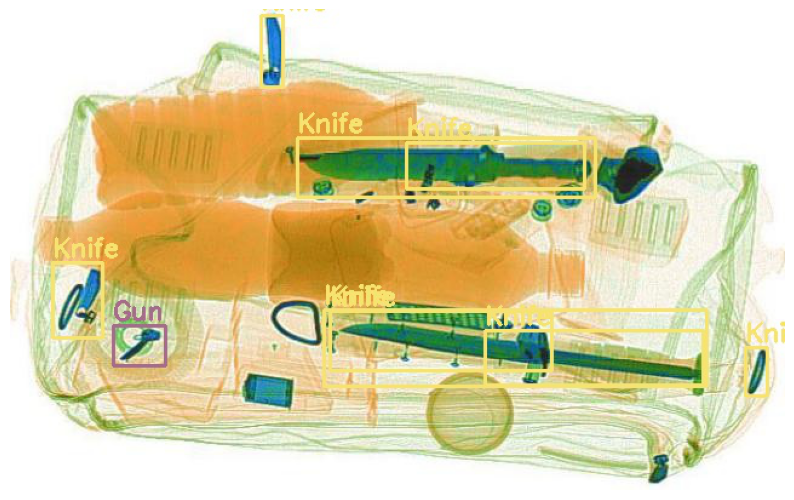

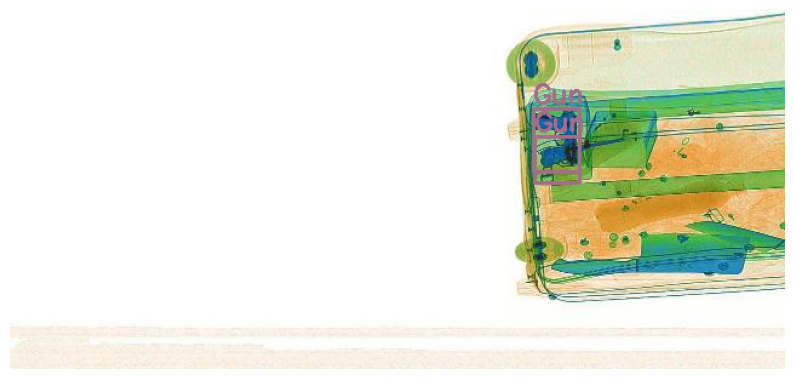

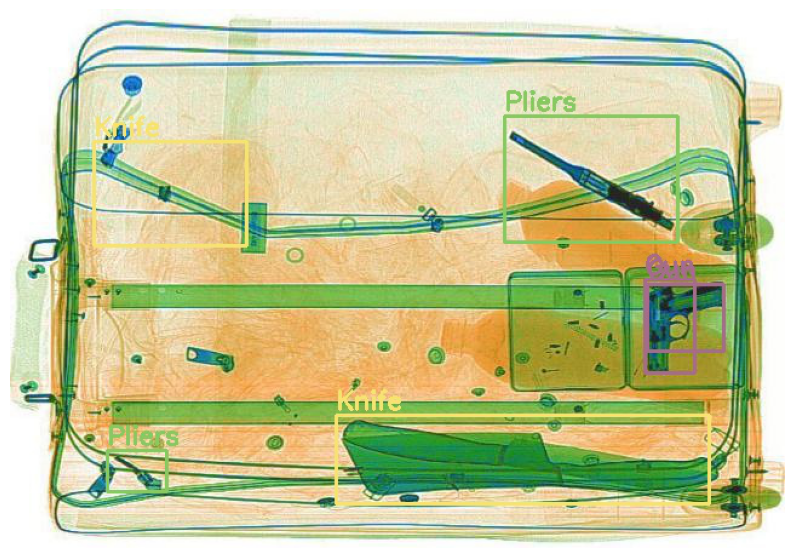

In [ ]:
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(4):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()